[0.1339619978826721, 0.29117581507930995, 0.3747233730023743, 0.42349732343942564, 0.43252902625129425, 0.3865385925843918, 0.3342123948212038, 0.2847566812288866, 0.23060371002839847, 0.1709138798784386, 0.03864698532397966, 0.006161420464216647, 0.0012177477698696844, 3.1917562807808454e-05, 3.316316531354987e-06, 5.513665437391806e-08, 2.2749181399861094e-09, 4.026867492574696e-10]


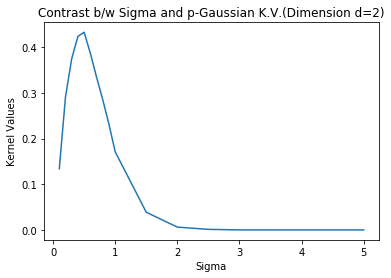

In [5]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10
dim=2

def p_gaussian_kernel(distances,p,sigma=1.0): 
    kernel_vals = np.exp( - (distances/sigma) **p) 
    return kernel_vals

def distance_from_origin(data):
    temp_sum=0
    for k in range(dim):
        temp_sum+=data[k]**2
    dist=temp_sum**0.5
    return dist
    
random.seed(100)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))

sigmas=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,2,2.5,3,3.5,4,4.5,5]
final_kernel_vals=[]

for sigma in sigmas:
    centroid, label = kmeans2(actual_data,M,minit='points')
    #print(centroid)
    centroid_distances_from_center=np.zeros(M)
       
    for i in range(M):
        centroid_distances_from_center[i]=distance_from_origin(centroid[i])
    #print(centroid_distances_from_center)
        
    farthest_centroid_distance=centroid_distances_from_center[0]
    f=0
    store_f=0
    for c in centroid_distances_from_center:
        if c>farthest_centroid_distance:
            farthest_centroid_distance=c
            store_f=f
        f=f+1
            
    farthest_centroid=centroid[store_f]
    #print(farthest_centroid)
        
    nearest_centroid_distance=centroid_distances_from_center[0]
    n=0
    store_n=0
    for c in centroid_distances_from_center:
        if c<nearest_centroid_distance:
            nearest_centroid_distance=c
            store_n=n
        n=n+1
            
    nearest_centroid=centroid[store_n]
    #print(nearest_centroid)
        
    distances_from_farthest_centroid = []
    distances_from_nearest_centroid = []
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-farthest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_farthest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-nearest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_nearest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    kernel_vals_for_farthest_centroid=np.zeros(N)
    kernel_vals_for_nearest_centroid=np.zeros(N)
    
    fd_5, fd_95 = np.percentile(distances_from_farthest_centroid,5),np.percentile(distances_from_farthest_centroid,95)
    fp_val=np.log(np.log(0.05)/np.log(0.95))/np.log(fd_5/fd_95)
    nd_5, nd_95 = np.percentile(distances_from_nearest_centroid,5),np.percentile(distances_from_nearest_centroid,95)
    np_val=np.log(np.log(0.05)/np.log(0.95))/np.log(nd_5/nd_95)
    
    for i in range(N):
        kernel_vals_for_farthest_centroid[i] = p_gaussian_kernel(distances_from_farthest_centroid[i],fp_val,sigma)
        kernel_vals_for_nearest_centroid[i] = p_gaussian_kernel(distances_from_nearest_centroid[i],np_val,sigma)
    
    temp_diff=0
    for l in range(N):
        temp_diff+=abs(kernel_vals_for_farthest_centroid[l]-kernel_vals_for_nearest_centroid[l])
    
    final_kernel_vals.append((1/N)*temp_diff)
        
#print(sigmas)
print(final_kernel_vals)
fig,ax=plt.subplots()
ax.set_title("Contrast b/w Sigma and p-Gaussian K.V.(Dimension d="+str(dim)+")")
ax.set_xlabel('Sigma')
ax.set_ylabel('Kernel Values')
plt.plot(sigmas,final_kernel_vals)
plt.savefig('Contrast between Sigma and p-Gaussian Kernel Values for dim 2')
plt.show()




[2.0039525594484075e-16, 2.853772773647734e-14, 1.8365514664608897e-12, 3.048508390168791e-11, 1.270291205557328e-11, 1.7120273476667336e-10, 1.7180588089554805e-06, 0.000630711280086056, 0.051443660409421665, 0.6593101230171869, 0.23512578411955148, 8.430826749410073e-07, 1.7944621984638275e-08]


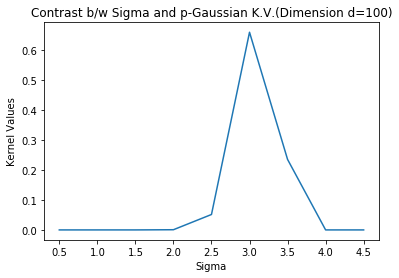

In [6]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10
dim=100

def p_gaussian_kernel(distances,p,sigma=1.0): 
    kernel_vals = np.exp( - (distances/sigma) **p) 
    return kernel_vals

def distance_from_origin(data):
    temp_sum=0
    for k in range(dim):
        temp_sum+=data[k]**2
    dist=temp_sum**0.5
    return dist
    
random.seed(100)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))

sigmas=[0.5,0.6,0.7,0.8,0.9,1.0,1.5,2,2.5,3,3.5,4,4.5]
final_kernel_vals=[]

for sigma in sigmas:
    centroid, label = kmeans2(actual_data,M,minit='points')
    #print(centroid)
    centroid_distances_from_center=np.zeros(M)
       
    for i in range(M):
        centroid_distances_from_center[i]=distance_from_origin(centroid[i])
    #print(centroid_distances_from_center)
        
    farthest_centroid_distance=centroid_distances_from_center[0]
    f=0
    store_f=0
    for c in centroid_distances_from_center:
        if c>farthest_centroid_distance:
            farthest_centroid_distance=c
            store_f=f
        f=f+1
            
    farthest_centroid=centroid[store_f]
    #print(farthest_centroid)
        
    nearest_centroid_distance=centroid_distances_from_center[0]
    n=0
    store_n=0
    for c in centroid_distances_from_center:
        if c<nearest_centroid_distance:
            nearest_centroid_distance=c
            store_n=n
        n=n+1
            
    nearest_centroid=centroid[store_n]
    #print(nearest_centroid)
        
    distances_from_farthest_centroid = []
    distances_from_nearest_centroid = []
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-farthest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_farthest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-nearest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_nearest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    kernel_vals_for_farthest_centroid=np.zeros(N)
    kernel_vals_for_nearest_centroid=np.zeros(N)
    
    fd_5, fd_95 = np.percentile(distances_from_farthest_centroid,5),np.percentile(distances_from_farthest_centroid,95)
    fp_val=np.log(np.log(0.05)/np.log(0.95))/np.log(fd_5/fd_95)
    nd_5, nd_95 = np.percentile(distances_from_nearest_centroid,5),np.percentile(distances_from_nearest_centroid,95)
    np_val=np.log(np.log(0.05)/np.log(0.95))/np.log(nd_5/nd_95)
    
    for i in range(N):
        kernel_vals_for_farthest_centroid[i] = p_gaussian_kernel(distances_from_farthest_centroid[i],fp_val,sigma)
        kernel_vals_for_nearest_centroid[i] = p_gaussian_kernel(distances_from_nearest_centroid[i],np_val,sigma)
    
    temp_diff=0
    for l in range(N):
        temp_diff+=abs(kernel_vals_for_farthest_centroid[l]-kernel_vals_for_nearest_centroid[l])
    
    final_kernel_vals.append((1/N)*temp_diff)
        
#print(sigmas)
print(final_kernel_vals)
fig,ax=plt.subplots()
ax.set_title("Contrast b/w Sigma and p-Gaussian K.V.(Dimension d="+str(dim)+")")
ax.set_xlabel('Sigma')
ax.set_ylabel('Kernel Values')
plt.plot(sigmas,final_kernel_vals)
plt.savefig('Contrast between Sigma and p-Gaussian Kernel Values for dim 100')
plt.show()



